# NLP- Data Cleaning, Tf-idf, BOW, Sentiment Analysis, Word Embeddings, Topic Modelling, NER, Coreference Resolution

This article is about language processing by computers.

Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.



We will discuss different feature extraction methods, starting with some basic techniques which will lead into advanced Natural Language Processing techniques. We will also learn about pre-processing of the text data in order to extract better features from clean data.

1. Basic feature extraction using text data

Number of words

Number of characters

Average word length

Number of stopwords

Number of special characters

Number of numerics

Number of uppercase words


2. Basic Text Pre-processing of text data

Lower casing

Punctuation removal

Stopwords removal

Frequent words removal

Rare words removal

Spelling correction

Tokenization

Stemming

Lemmatization


3. Advance Text Processing

N-grams

Term Frequency

Inverse Document Frequency

Term Frequency-Inverse Document Frequency (TF-IDF)

Bag of Words

Sentiment Analysis

Word Embedding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import gensim
import pickle
import random
import itertools

/home/harpreet/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
pwd

'/home/harpreet/Documents'

In [3]:
cd /media/harpreet/OS/Users/manpreet singh

/media/harpreet/OS/Users/manpreet singh


In [4]:
data=pd.read_csv('news_articles.csv')

In [5]:
data.head()

,Article_Id,Title,Author,Date,Content,URL
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...


In [6]:
len(data)

4831

In [7]:
# Number of words
data['word_count'] = data['Content'].apply(lambda x: len(str(x).split(" ")))
data[['Content','word_count']].head()

,Content,word_count
0,At least 14 people died and 17 others were inj...,233
1,TV actress Pratibha Tiwari who is best known ...,231
2,The United States and South Korea began a join...,247
3,The relentless drive by Bengaluru s Bangalore...,355
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,272


In [8]:
# Number of characters
data['char_count'] = data['Content'].str.len() ## this also includes spaces
data[['Content','char_count']].head()

,Content,char_count
0,At least 14 people died and 17 others were inj...,1355
1,TV actress Pratibha Tiwari who is best known ...,1215
2,The United States and South Korea began a join...,1369
3,The relentless drive by Bengaluru s Bangalore...,2024
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,1467


In [9]:
# Average Word Length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Content'].apply(lambda x: avg_word(x))
data[['Content','avg_word']].head()

,Content,avg_word
0,At least 14 people died and 17 others were inj...,5.022523
1,TV actress Pratibha Tiwari who is best known ...,4.890000
2,The United States and South Korea began a join...,4.920705
3,The relentless drive by Bengaluru s Bangalore...,5.104615
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,4.868852


In [10]:
# Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['stopwords'] = data['Content'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Content','stopwords']].head()

,Content,stopwords
0,At least 14 people died and 17 others were inj...,85
1,TV actress Pratibha Tiwari who is best known ...,81
2,The United States and South Korea began a join...,76
3,The relentless drive by Bengaluru s Bangalore...,133
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,90


In [11]:
# Number of special characters
data['hastags'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Content','hastags']].head()

,Content,hastags
0,At least 14 people died and 17 others were inj...,0
1,TV actress Pratibha Tiwari who is best known ...,0
2,The United States and South Korea began a join...,0
3,The relentless drive by Bengaluru s Bangalore...,0
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,0


In [12]:
# Number of Numerics
data['numerics'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Content','numerics']].head()

,Content,numerics
0,At least 14 people died and 17 others were inj...,6
1,TV actress Pratibha Tiwari who is best known ...,4
2,The United States and South Korea began a join...,3
3,The relentless drive by Bengaluru s Bangalore...,2
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,12


In [13]:
#Number of uppercase words
data['upper'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Content','upper']].head()

,Content,upper
0,At least 14 people died and 17 others were inj...,0
1,TV actress Pratibha Tiwari who is best known ...,4
2,The United States and South Korea began a join...,8
3,The relentless drive by Bengaluru s Bangalore...,4
4,Punjab Gau Raksha Dal chief Satish Kumar and h...,3


In [14]:
#Lower case
data['Content'] = data['Content'].apply(lambda x: x.lower())
data['Content'].head()

0    at least 14 people died and 17 others were inj...
1    tv actress pratibha tiwari  who is best known ...
2    the united states and south korea began a join...
3    the relentless drive by bengaluru s  bangalore...
4    punjab gau raksha dal chief satish kumar and h...
Name: Content, dtype: object

In [15]:
#Removing Punctuations and Numbers
data['Content'] = data['Content'].str.replace('[^\w\s]','')
data['Content'] = data['Content'].str.replace('\d+', '')
data['Content'].head()

0    at least  people died and  others were injured...
1    tv actress pratibha tiwari  who is best known ...
2    the united states and south korea began a join...
3    the relentless drive by bengaluru s  bangalore...
4    punjab gau raksha dal chief satish kumar and h...
Name: Content, dtype: object

In [16]:
#Removal of Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Content'] = data['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Content'].head()

0    least people died others injured bus travellin...
1    tv actress pratibha tiwari best known role saa...
2    united states south korea began joint military...
3    relentless drive bengaluru bangalore civic aut...
4    punjab gau raksha dal chief satish kumar accom...
Name: Content, dtype: object

In [17]:
# Common word removal
freq = pd.Series(' '.join(data['Content']).split()).value_counts()[:10]
freq

india      5048
said       4945
also       4404
one        2695
new        2491
film       2409
year       2397
rs         2391
android    2069
two        2014
dtype: int64

In [18]:
#Lets remove the common words
freq = list(freq.index)
data['Content'] = data['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Content'].head()

0    least people died others injured bus travellin...
1    tv actress pratibha tiwari best known role saa...
2    united states south korea began joint military...
3    relentless drive bengaluru bangalore civic aut...
4    punjab gau raksha dal chief satish kumar accom...
Name: Content, dtype: object

In [19]:
#Rare word removal
freq = pd.Series(' '.join(data['Content']).split()).value_counts()[-10:]
freq

drugdrama          1
daadullah          1
decentlyfocused    1
extinction         1
serenade           1
elude              1
eyebrowraising     1
pelletguns         1
telly              1
parekh             1
dtype: int64

In [20]:
#Removing rare words
freq = list(freq.index)
data['Content'] = data['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Content'].head()

0    least people died others injured bus travellin...
1    tv actress pratibha tiwari best known role saa...
2    united states south korea began joint military...
3    relentless drive bengaluru bangalore civic aut...
4    punjab gau raksha dal chief satish kumar accom...
Name: Content, dtype: object

In [21]:
# Spelling Correction
from textblob import TextBlob
data['Content'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    least people died others injured bus travellin...
1    to actress pratibha toward best known role sta...
2    united states south more began joint military ...
3    relentless drive bengaluru bangalore civic aut...
4    punjab gap masha day chief spanish human accom...
Name: Content, dtype: object

In [22]:
# Tokenization
TextBlob(data['Content'][1]).words

WordList(['tv', 'actress', 'pratibha', 'tiwari', 'best', 'known', 'role', 'saath', 'nibhana', 'saathiya', 'molested', 'stranger', 'busy', 'road', 'mumbai', 'reported', 'pratibha', 'waiting', 'colleague', 'along', 'hairdresser', 'drunk', 'man', 'came', 'molested', 'actress', 'incident', 'happened', 'p', 'however', 'saath', 'nibhana', 'saathiya', 'fought', 'back', 'dragged', 'accused', 'nearby', 'police', 'station', 'filed', 'fir', 'alleged', 'molester', 'pratibha', 'expressed', 'shock', 'anyone', 'daring', 'misbehave', 'girl', 'surprising', 'incident', 'could', 'occur', 'busy', 'road', 'pm', 'shocking', 'revelation', 'learnt', 'women', 'scared', 'lodge', 'complaint', 'cases', 'would', 'urge', 'fight', 'told', 'times', 'actress', 'came', 'limelight', 'show', 'titled', 'tujhse', 'naraz', 'nahi', 'zindagi', 'done', 'number', 'commercials', 'plays', 'character', 'navya', 'negative', 'shade', 'saath', 'nibhana', 'saathiya', 'http', 'www', 'ibtimes', 'co', 'pratibhatiwarimolestedbusyroadsaath

In [23]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Content'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    least peopl die other injur bu travel hyderaba...
1    tv actress pratibha tiwari best known role saa...
2    unit state south korea began joint militari dr...
3    relentless drive bengaluru bangalor civic auth...
4    punjab gau raksha dal chief satish kumar accom...
Name: Content, dtype: object

In [24]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("Blessing"))

print(stemmer.stem("reached"))

bless
reach


In [25]:
# Lemmatization
from textblob import Word
data['Content'] = data['Content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Content'].head()

0    least people died others injured bus travellin...
1    tv actress pratibha tiwari best known role saa...
2    united state south korea began joint military ...
3    relentless drive bengaluru bangalore civic aut...
4    punjab gau raksha dal chief satish kumar accom...
Name: Content, dtype: object

In [ ]:
test = pd.DataFrame(data["Content"])
# test.columns=["Content"]
test.head()

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['Content_without_stopwords'] = test['Content'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
test.head()

In [102]:
freq = list(freq.index)
test['updated'] = test['Content_without_stopwords'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test.head()

,Content,Content_without_stopwords,updated
0,least 14 people died 17 others injured bus tra...,least 14 people died 17 others injured bus tra...,least 14 people died 17 others injured bus tra...
1,tv actress pratibha tiwari best known role saa...,tv actress pratibha tiwari best known role saa...,tv actress pratibha tiwari best known role saa...
2,united state south korea began joint military ...,united state south korea began joint military ...,united state south korea began joint military ...
3,relentless drive bengaluru bangalore civic aut...,relentless drive bengaluru bangalore civic aut...,relentless drive bengaluru bangalore civic aut...
4,punjab gau raksha dal chief satish kumar accom...,punjab gau raksha dal chief satish kumar accom...,punjab gau raksha dal chief satish kumar accom...


In [103]:
#Removing Rare words
freq = pd.Series(' '.join(test['Content_without_stopwords']).split()).value_counts()[-10:]
freq

kirch             1
7922              1
kapoorsonakshi    1
7784              1
kaate             1
12558             1
1001              1
ultimatum         1
501               1
shariah           1
dtype: int64

In [104]:
freq = list(freq.index)
test['updated'] = test['updated'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test.head()

,Content,Content_without_stopwords,updated
0,least 14 people died 17 others injured bus tra...,least 14 people died 17 others injured bus tra...,least 14 people died 17 others injured bus tra...
1,tv actress pratibha tiwari best known role saa...,tv actress pratibha tiwari best known role saa...,tv actress pratibha tiwari best known role saa...
2,united state south korea began joint military ...,united state south korea began joint military ...,united state south korea began joint military ...
3,relentless drive bengaluru bangalore civic aut...,relentless drive bengaluru bangalore civic aut...,relentless drive bengaluru bangalore civic aut...
4,punjab gau raksha dal chief satish kumar accom...,punjab gau raksha dal chief satish kumar accom...,punjab gau raksha dal chief satish kumar accom...


In [1]:
#TOKENIZATION
# from textblob import TextBlob
# for i in range(len(data)):
#     tokens=print(TextBlob(test['updated'][i]).words[:5])
#     print(tokens)

In [112]:
for i in range(len(data)):
    print(len(TextBlob(test['updated'][i]).words))

127
106
135
177
136
93
209
138
63
65
186
222
133
66
200
335
106
21
130
92
116
164
129
246
58
115
212
88
98
123
227
144
177
34
46
153
148
72
124
57
68
152
24
88
184
36
143
103
60
74
19
51
26
286
25
16
102
107
149
152
178
147
142
134
168
184
137
131
216
221
86
38
130
69
48
123
41
158
19
17
43
21
123
153
9
120
62
9
149
34
148
119
36
71
130
170
51
113
69
13
69
75
53
47
135
290
8
16
57
77
58
11
28
52
41
319
21
45
133
40
198
55
134
151
78
22
16
166
8
23
25
15
110
73
16
135
17
39
104
32
130
229
33
248
56
5
28
38
93
133
190
32
153
82
194
30
42
41
136
187
228
75
131
26
6
148
48
59
6
261
177
69
97
161
33
141
97
184
12
46
109
115
85
54
8
166
153
29
117
8
137
14
324
5
8
2
29
131
55
94
24
136
118
70
13
74
156
186
162
176
11
174
10
62
29
42
17
64
124
16
59
42
24
26
143
94
66
169
7
11
18
13
89
23
56
53
10
16
10
47
167
179
211
108
22
54
32
18
75
235
15
19
80
58
24
136
46
24
11
13
100
27
19
43
65
221
136
21
18
202
9
120
8
80
298
91
96
63
482
26
27
127
111
52
77
22
158
54
175
181
73
50
35
58
16
49
114
5

153
79
52
26
51
109
129
63
87
141
200
246
54
126
158
121
142
296
72
49
105
387
99
151
224
111
125
168
78
50
185
101
160
223
213
52
107
63
383
53
180
167
214
458
120
178
190
156
168
166
374
116
61
98
151
85
71
63
157
175
176
181
175
196
116
162
338
48
115
108
186
188
32
218
64
131
168
169
77
102
88
123
154
211
192
240
255
222
134
31
26
183
45
11
104
103
125
189
35
218
246
76
122
103
65
227
112
189
100
109
214
95
103
150
205
241
38
262
259
113
90
222
165
61
193
261
105
35
103
194
212
82
72
93
160
159
130
244
37
60
95
112
123
156
132
151
67
102
391
94
215
213
155
88
109
171
73
55
152
254
85
78
155
127
164
74
170
169
38
96
227
87
236
168
150
17
77
170
92
222
127


KeyboardInterrupt: 

In [80]:
#STEMMING
from nltk.stem import PorterStemmer
st = PorterStemmer()
test['updated'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    least peopl die other injur bu travel hyderaba...
1    tv actress pratibha tiwari best known role saa...
2    unit state south korea began joint militari dr...
3    relentless drive bengaluru bangalor civic auth...
4    punjab gau raksha dal chief satish kumar accom...
Name: updated, dtype: object

In [82]:
#LEMMATIZATION
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
text=test['Content']
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df = pd.DataFrame(test['updated'])
df['text_lemmatized'] = test.updated.apply(lemmatize_text)
df.head()

,updated,text_lemmatized
0,least people died others injured bus travellin...,"[least, people, died, others, injured, bus, tr..."
1,tv actress pratibha tiwari best known role saa...,"[tv, actress, pratibha, tiwari, best, known, r..."
2,united states south korea began joint military...,"[united, state, south, korea, began, joint, mi..."
3,relentless drive bengaluru bangalore civic aut...,"[relentless, drive, bengaluru, bangalore, civi..."
4,punjab gau raksha dal chief satish kumar accom...,"[punjab, gau, raksha, dal, chief, satish, kuma..."


In [83]:
#Ngrams
TextBlob(test['updated'][0]).ngrams(2)

[WordList(['least', 'people']),
 WordList(['people', 'died']),
 WordList(['died', 'others']),
 WordList(['others', 'injured']),
 WordList(['injured', 'bus']),
 WordList(['bus', 'travelling']),
 WordList(['travelling', 'hyderabad']),
 WordList(['hyderabad', 'kakinada']),
 WordList(['kakinada', 'plunged']),
 WordList(['plunged', 'canal']),
 WordList(['canal', 'bridge']),
 WordList(['bridge', 'accidentprone']),
 WordList(['accidentprone', 'stretch']),
 WordList(['stretch', 'hyderabadkhammam']),
 WordList(['hyderabadkhammam', 'highway']),
 WordList(['highway', 'telangana']),
 WordList(['telangana', 'early']),
 WordList(['early', 'monday']),
 WordList(['monday', 'morning']),
 WordList(['morning', 'injured']),
 WordList(['injured', 'admitted']),
 WordList(['admitted', 'government']),
 WordList(['government', 'general']),
 WordList(['general', 'hospital']),
 WordList(['hospital', 'treatment']),
 WordList(['treatment', 'seven']),
 WordList(['seven', 'people']),
 WordList(['people', 'died']),
 

### Term Frequency


Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [64]:
tf1 = (data['Content'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,saathiya,3
1,actress,3
2,pratibha,3
3,nibhana,3
4,saath,3


### Inverse Document Frequency 

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

So, let’s calculate IDF for the same tweets for which we calculated the term frequency.

In [82]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Content'].str.contains(word)])))
tf1.head()

,words,tf,idf
0,saathiya,3,8.482809
1,actress,3,2.602276
2,pratibha,3,7.789662
3,nibhana,3,8.482809
4,saath,3,7.096514


The more the value of IDF, the more unique is the word.

### Term Frequency Inverse Document Frequency 

TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [84]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head(10)

,words,tf,idf,tfidf
0,saathiya,3,8.482809,25.448426
1,actress,3,2.602276,7.806827
2,pratibha,3,7.789662,23.368985
3,nibhana,3,8.482809,25.448426
4,saath,3,7.096514,21.289543
5,molested,2,6.536899,13.073797
6,road,2,2.812928,5.625856
7,came,2,1.667169,3.334338
8,incident,2,2.759224,5.518447
9,busy,2,3.395212,6.790425


We can see that the TF-IDF has penalized words like ‘came’, ‘incident’, and ‘road’ because they are commonly occurring words. However, it has given a high weight to “saathiya” and "nibhana" since that will be very useful in determining the sentiment of the Content.

We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data['Content'])

train_vect

<4831x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 226831 stored elements in Compressed Sparse Row format>

### Bag of Words 

Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(data['Content'])
train_bow

<4831x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 254022 stored elements in Compressed Sparse Row format>

In [88]:
data['sentiment'] = data['Content'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Content','sentiment']].head()

,Content,sentiment
0,least 14 people died 17 others injured bus tra...,-0.005909
1,tv actress pratibha tiwari best known role saa...,-0.027273
2,united state south korea began joint military ...,-0.005556
3,relentless drive bengaluru bangalore civic aut...,-0.047222
4,punjab gau raksha dal chief satish kumar accom...,-0.036458


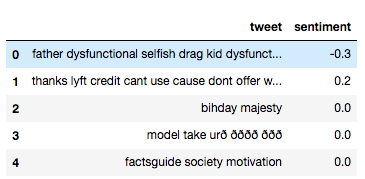

### Word Embeddings 

Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

Here, we will use pre-trained word vectors which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.

The first step here is to convert it into the word2vec format.



In [92]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

Now, we can load the above word2vec file as a model.



In [93]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our text contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:



In [94]:
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [95]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

In [96]:
(model['go'] + model['away'])/2

array([-0.091342  ,  0.223404  ,  0.58856   , -0.614765  , -0.0838365 ,
        0.5387    , -0.43531   ,  0.349125  ,  0.163308  , -0.28223   ,
        0.53547   ,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.553275  ,  0.385575  ,
        0.565335  ,  0.805405  ,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543   , -0.571035  , -0.59926   ,  0.422585  , -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.381435  , -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55665   , -0.32982   ,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332   ,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895   , -0.33707   ,  0.083195  ,  1.86185   ,  0.283465  ,
       -0.13081   ,  0.927795  , -0.37028   ,  0.1885465 ,  0.66198   ,
        0.505175  ,  0.37748498,  0.1322995 , -0.380375  , -0.02

## Tfidf

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
def tfidf_scores(d):
    tfidf=vectorizer.fit_transform(d)
    return tfidf

n_data=[]
for i in df['text_lemmatized']:
    n_data.append(' '.join(i))
new_data=pd.Series(n_data) 
scores=tfidf_scores(data)
t_vocab=list(vectorizer.vocabulary_)

In [92]:
type(data)

pandas.core.series.Series

In [88]:
len(t_vocab)

39029

In [89]:
t_vocab

['at',
 'least',
 'people',
 'died',
 'and',
 'others',
 'were',
 'injured',
 'after',
 'bus',
 'travelling',
 'from',
 'hyderabad',
 'to',
 'kakinada',
 'plunged',
 'into',
 'canal',
 'bridge',
 'on',
 'the',
 'accidentprone',
 'stretch',
 'of',
 'hyderabadkhammam',
 'highway',
 'in',
 'telangana',
 'early',
 'monday',
 'morning',
 'admitted',
 'government',
 'general',
 'hospital',
 'for',
 'treatment',
 'seven',
 'spot',
 'succumbed',
 'injuries',
 'while',
 'undergoing',
 'passengers',
 'belonged',
 'east',
 'west',
 'godavari',
 'districts',
 'andhra',
 'pradesh',
 'owned',
 'by',
 'private',
 'operator',
 'yatra',
 'genie',
 'commenced',
 'its',
 'journey',
 'sunday',
 'khammam',
 'superintendent',
 'police',
 'shah',
 'nawaz',
 'khan',
 'was',
 'quoted',
 'hindustan',
 'times',
 'as',
 'saying',
 'accident',
 'happened',
 'around',
 'when',
 'driver',
 'slammed',
 'brakes',
 'avoid',
 'collision',
 'with',
 'another',
 'vehicle',
 'coming',
 'opposite',
 'direction',
 'over',
 '

In [90]:
print(scores[1])

  (0, 2523)	0.059149925660118674
  (0, 1608)	0.04113488934363454
  (0, 35396)	0.0828190240742355
  (0, 24234)	0.029595608540794665
  (0, 34925)	0.10346123429972151
  (0, 24082)	0.05334168179589913
  (0, 16025)	0.06776514338031776
  (0, 12652)	0.03187245339444128
  (0, 5141)	0.017849650098591532
  (0, 26191)	0.03971242604277419
  (0, 37869)	0.05879222748114332
  (0, 35293)	0.038189429634838214
  (0, 14517)	0.060608422978628534
  (0, 38137)	0.03127762199014737
  (0, 38326)	0.05119559202266981
  (0, 28900)	0.033441179677437476
  (0, 38149)	0.022416627985245415
  (0, 17066)	0.07440825112159524
  (0, 38174)	0.024769243438581317
  (0, 36052)	0.05659437665586578
  (0, 436)	0.13873072126587271
  (0, 26563)	0.314440232294391
  (0, 35372)	0.08857107677978555
  (0, 16979)	0.0314470209155301
  (0, 3789)	0.04513982805001832
  :	:
  (0, 22782)	0.08748334773013025
  (0, 38983)	0.10121709775267058
  (0, 14323)	0.023799997191292298
  (0, 9865)	0.04521045534522339
  (0, 23905)	0.042456402104604614
  (0,

## Topic Modelling

In [39]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [46]:
sentences=df['text_lemmatized'] 
en_model=KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [47]:
g_vocab=list(vectorizer.vocabulary_.keys())
len(g_vocab)

39029

In [1]:
#dim=300
#en_ignored=[]
#en_w2vectors=np.ones((1,dim))
#for i in g_vocab:
    #if i in en_model:
        #en_w2vectors=np.concatenate((en_w2vectors,en_model[i].reshape(1,-1)),axis=0)
    #else:
        #en_ignored.append(i)
        #en_w2vectors=np.concatenate((en_w2vectors,np.zeros((1,dim))),axis=0)

In [ ]:
#pickle.dump(w2v,open('w2v.pickle','wb'))

In [48]:
w2v=pickle.load(open('w2v.pickle','rb'))
w2v

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13183594, -0.06103516, -0.18847656, ...,  0.01312256,
        -0.03808594,  0.27148438],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05859375, -0.10595703, -0.2421875 , ..., -0.15820312,
         0.02783203, -0.03588867],
       [ 0.13085938,  0.33203125, -0.19726562, ..., -0.00946045,
        -0.08154297,  0.13671875],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [2]:
# d2v=scores*w2v
# d2v.shape

In [ ]:
#pickle.dump(d2v,open('d2v.pickle','wb'))

In [49]:
d2v=pickle.load(open('d2v.pickle','rb'))
d2v.shape

(4831, 300)

In [52]:
#Clustering
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(scores)

clusters = km.labels_.tolist()
for item in clusters:
    print("Cluster ", item)

CPU times: user 2min 23s, sys: 518 ms, total: 2min 24s
Wall time: 1min 33s
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  0
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
C

Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  2
Cluster  2
Cluster  1
Cluster  1
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  1
Cluster  2
Cluster  1
Cluster  1
Cluster  2
Cluster  2
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  2
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  3
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  4
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  3
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  4
Cluster  1
Cluster  1
Cluster  0
Cluster  1

Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0

Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5).fit(d2v)
cluster=kmeans.predict(d2v)

In [54]:
cluster

array([0, 4, 4, ..., 4, 4, 4], dtype=int32)

In [55]:
#defining clusters
def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

    
cluster0=ClusterIndicesNumpy(0, kmeans.labels_)
cluster1=ClusterIndicesNumpy(1, kmeans.labels_)
cluster2=ClusterIndicesNumpy(2, kmeans.labels_)
cluster3=ClusterIndicesNumpy(3, kmeans.labels_)
cluster4=ClusterIndicesNumpy(4, kmeans.labels_)
#extracting two two documents from different clusters
def art_id():
    docid=[]
    docid=np.array(docid)
    n0=np.random.choice(cluster0,2)
    n1=np.random.choice(cluster1,2)
    n2=np.random.choice(cluster2,2)
    n3=np.random.choice(cluster3,2)
    n4=np.random.choice(cluster4,2)
    docid=np.concatenate((n0,n1,n2,n3,n4),axis=0)
    return docid

In [56]:
art_id()

array([3883, 1930, 2503, 3267,  720,  445, 1079,  881, 4060, 4350])

In [57]:
article_id=[]
for i in range(15):
    id=art_id()
    article_id.append(id)
arti_id=np.array(article_id).ravel()

In [58]:
#Generating UserID
usr_id1=np.empty(50)
usr_id1.fill(1)
usr_id2=np.empty(50)
usr_id2.fill(2)
usr_id3=np.empty(50)
usr_id3.fill(3)
usr_id = np.concatenate((usr_id1,usr_id2,usr_id3))

In [59]:
usr_id

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [60]:
#Gen Article Rank
art_rank=[]
for i in range(15):
    for j in range(10):
        art_rank.append(j+1)
art_rank=np.array(art_rank)

In [61]:
art_rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [62]:
click_stream=np.random.binomial(1,0.7,150)

In [63]:
cluster4.shape,cluster3.shape,cluster2.shape,cluster1.shape,cluster0.shape

((2012,), (120,), (507,), (673,), (1519,))

In [64]:
cluster4

array([   1,    2,    6, ..., 4828, 4829, 4830])

## Data Generation

In [65]:
# avg. reading speed (200 wpm)
speed=200
import statistics

In [66]:
l1=[]
for i in range(len(data)):
    length1 = (len(data[i])/200)*0.1
    l1.append(length1)
time_array1=np.asarray(l1)
mean_time1=np.mean(time_array1)
print(mean_time1)
std_dev1=np.std(time_array1)
print(std_dev1)

0.7713702132063756
0.49980094508500267


In [67]:
l2=[]
for i in range(len(data)):
    length2 = (len(data[i])/200)*0.5
    l2.append(length2)
time_array2=np.asarray(l2)
mean_time2=np.mean(time_array2)
print(mean_time2)
std_dev2=np.std(time_array2)
print(std_dev2)

3.856851066031877
2.499004725425013


In [68]:
l3=[]
for i in range(len(data)):
    length3 = (len(data[i])/200)
    l3.append(length3)
time_array3=np.asarray(l3)
mean_time3=np.mean(time_array3)
print(mean_time3)
std_dev3=np.std(time_array3)
print(std_dev3)

7.713702132063754
4.998009450850026


In [69]:
import scipy.stats
mycomps = (scipy.stats.norm(mean_time1, std_dev1),scipy.stats.norm(mean_time2, std_dev2),scipy.stats.norm(mean_time3, std_dev3))
priors = [0.3,0.4,0.3]

In [70]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [71]:
import numpy as np
x_data = np.linspace(0.0,20,1000)

In [72]:
y_data = myMixture(x_data,priors,mycomps)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


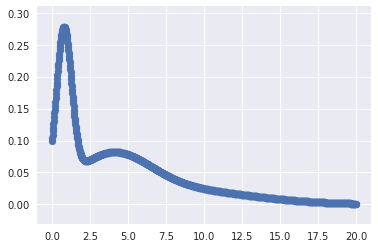

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [74]:
def LLE(data,priors,myComponents):
    probs = myMixture(data,priors,myComponents)
    lle = sum(np.log(probs))
    return lle

In [75]:
data = [0.5,0.8,1,5,6,9]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.2409977  0.27848641 0.25860841 0.07817698 0.06678651 0.03084732]


-12.787533770300744

In [76]:
data = [1,3,1,3,7,7]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.25860841 0.0755716  0.25860841 0.0755716  0.05265556 0.05265556]


-13.758196773544713

In [77]:
data = np.random.rand(100000)*20

(array([10064., 10028., 10101., 10122., 10044., 10051.,  9967.,  9963.,
         9886.,  9774.]),
 array([1.16786063e-04, 2.00009741e+00, 4.00007804e+00, 6.00005866e+00,
        8.00003929e+00, 1.00000199e+01, 1.20000005e+01, 1.39999812e+01,
        1.59999618e+01, 1.79999424e+01, 1.99999230e+01]),
 <a list of 10 Patch objects>)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


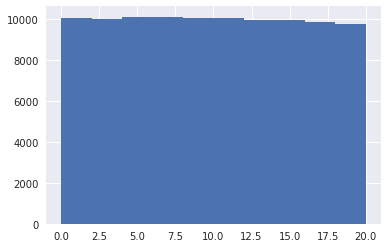

In [78]:
plt.hist(data)

In [79]:
LLE(data,priors,mycomps)/data.shape

array([-3.79756759])

In [80]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for comp,prior in zip(myComponents,priors):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData

In [81]:
tdata = genSample(10,priors,mycomps)
LLE(data,priors,mycomps)/data.shape
tdata[tdata<0]=0

In [82]:
print(tdata)

[0.45194484 0.         1.170277   2.57000205 0.85045268 3.11969684
 3.93104864 5.27988398 5.76328688 9.31999738]


(array([10064., 10028., 10101., 10122., 10044., 10051.,  9967.,  9963.,
         9886.,  9774.]),
 array([1.16786063e-04, 2.00009741e+00, 4.00007804e+00, 6.00005866e+00,
        8.00003929e+00, 1.00000199e+01, 1.20000005e+01, 1.39999812e+01,
        1.59999618e+01, 1.79999424e+01, 1.99999230e+01]),
 <a list of 10 Patch objects>)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


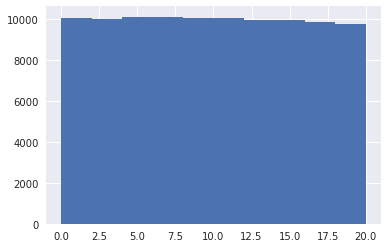

In [83]:
plt.hist(data)

In [84]:
#Gen time spent
time=[]
for i in range(15):
    time.append(tdata)
time_sp=np.array(time).ravel()
time_sp.shape

(150,)

In [85]:
time_spent=click_stream*time_sp    
time_spent.shape

(150,)

In [86]:
d={"Click":click_stream,"SessionID":usr_id,"UserID":usr_id,"Article_ID_Served":arti_id,"Article_Rank":art_rank,"Time_Spent":time_spent}

In [87]:
dtaframe=pd.DataFrame(d)

In [88]:
dtaframe

,Article_ID_Served,Article_Rank,Click,SessionID,Time_Spent,UserID
0,3099,1,0,1.0,0.000000,1.0
1,697,2,1,1.0,0.000000,1.0
2,3221,3,1,1.0,1.170277,1.0
3,782,4,1,1.0,2.570002,1.0
4,3136,5,1,1.0,0.850453,1.0
5,4625,6,1,1.0,3.119697,1.0
6,1039,7,0,1.0,0.000000,1.0
7,1074,8,1,1.0,5.279884,1.0
8,1265,9,0,1.0,0.000000,1.0
9,1349,10,0,1.0,0.000000,1.0


In [89]:
np.where(dtaframe['Article_ID_Served']==325)

(array([], dtype=int64),)

In [90]:
any(dtaframe['Article_ID_Served'].duplicated())

True

In [91]:
ids = dtaframe["Article_ID_Served"]
dtaframe[ids.isin(ids[ids.duplicated()])]

,Article_ID_Served,Article_Rank,Click,SessionID,Time_Spent,UserID
77,1235,8,0,2.0,0.0,2.0
97,1235,8,0,2.0,0.0,2.0


In [92]:
dtaframe['SessionID'][0:10]=1

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
dtaframe['SessionID'][10:20]=2

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
dtaframe['SessionID'][20:30]=3

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
dtaframe['SessionID'][30:40]=4

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
dtaframe['SessionID'][40:50]=5

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
dtaframe['SessionID'][50:100]=dtaframe['SessionID'][0:50]

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
dtaframe['SessionID'][100:150]=dtaframe['SessionID'][50:100]

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
dtaframe

,Article_ID_Served,Article_Rank,Click,SessionID,Time_Spent,UserID
0,3099,1,0,1.0,0.000000,1.0
1,697,2,1,1.0,0.000000,1.0
2,3221,3,1,1.0,1.170277,1.0
3,782,4,1,1.0,2.570002,1.0
4,3136,5,1,1.0,0.850453,1.0
5,4625,6,1,1.0,3.119697,1.0
6,1039,7,0,1.0,0.000000,1.0
7,1074,8,1,1.0,5.279884,1.0
8,1265,9,0,1.0,0.000000,1.0
9,1349,10,0,1.0,0.000000,1.0


## User Profiling

In [100]:
weights=[]
for i in range(0,150):
    article=dtaframe['Article_ID_Served'][i]
    article_id_row=dtaframe[dtaframe['Article_ID_Served']==article]
    print(article_id_row)
    time_of_article=article_id_row['Time_Spent']
    avg_time=np.average(time_of_article)
    #print(time_of_article)
    weights.append(time_of_article.loc[i]/avg_time)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
0               3099             1      0        1.0         0.0     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
1                697             2      1        1.0         0.0     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
2               3221             3      1        1.0    1.170277     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
3                782             4      1        1.0    2.570002     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
4               3136             5      1        1.0    0.850453     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
5               4625             6      1        1.0    3.119697     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
6               1039             7      0        1.

57               1222             8      1        1.0    5.279884     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
58               2557             9      0        1.0         0.0     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
59               4036            10      1        1.0    9.319997     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
60                 11             1      1        2.0    0.451945     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
61               4604             2      1        2.0         0.0     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
62               3600             3      1        2.0    1.170277     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
63               2836             4      1        2.0    2.570002     2.0
    Article_ID_Served  Article_Rank  C

     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
114                298             5      0        2.0         0.0     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
115               3311             6      1        2.0    3.119697     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
116               1210             7      1        2.0    3.931049     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
117                953             8      1        2.0    5.279884     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
118               4656             9      1        2.0    5.763287     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
119               4669            10      1        2.0    9.319997     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
120               3322   

In [101]:
weights=np.array(weights)
weights[np.isnan(weights)]=0  #replacing nan values
weights

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.])

In [102]:
d={"Click":click_stream,"SessionID":usr_id,"UserID":usr_id,"Article_ID_Served":arti_id,"Article_Rank":art_rank,"Time_Spent":time_spent,'Weight':weights}

In [103]:
dtaframe=pd.DataFrame(d)

In [104]:
dtaframe

,Article_ID_Served,Article_Rank,Click,SessionID,Time_Spent,UserID,Weight
0,3099,1,0,1.0,0.000000,1.0,0.0
1,697,2,1,1.0,0.000000,1.0,0.0
2,3221,3,1,1.0,1.170277,1.0,1.0
3,782,4,1,1.0,2.570002,1.0,1.0
4,3136,5,1,1.0,0.850453,1.0,1.0
5,4625,6,1,1.0,3.119697,1.0,1.0
6,1039,7,0,1.0,0.000000,1.0,0.0
7,1074,8,1,1.0,5.279884,1.0,1.0
8,1265,9,0,1.0,0.000000,1.0,0.0
9,1349,10,0,1.0,0.000000,1.0,0.0


In [105]:
topic_interest=[]
for i in range(0,150):
    articles=dtaframe['Article_ID_Served'][i]
    product=d2v[articles]*dtaframe['Weight'][i]
    topic_interest.append(product)

In [106]:
topic_interest=np.array(topic_interest)
topic_interest

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.12449557,  0.45510451,  0.18716229, ..., -0.54466668,
         0.13534582,  0.26620325],
       ...,
       [ 0.10504792,  0.30939653,  0.06631416, ..., -0.4663429 ,
         0.27440305,  0.48863929],
       [ 0.22897863,  0.21232008, -0.00094871, ..., -0.39744713,
         0.07709139,  0.41610053],
       [ 0.16170146,  0.36138103, -0.03048839, ..., -0.3349061 ,
        -0.02086163,  0.48990322]])

In [107]:
zzzz=pd.DataFrame(topic_interest)

In [108]:
zzzz

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
2,0.124496,0.455105,0.187162,0.999551,-0.414454,-0.188572,-0.022359,-0.658540,0.571506,0.653120,...,-0.335222,0.032673,-0.490674,0.073129,-0.181032,0.094682,-0.330279,-0.544667,0.135346,0.266203
3,0.028219,0.320940,0.136998,0.586399,-0.466404,-0.055790,0.099910,-0.514246,0.389307,0.609718,...,-0.438170,-0.008964,-0.362306,0.063670,-0.203188,-0.140600,-0.164387,-0.754314,0.108673,0.323777
4,-0.012176,0.244007,-0.035300,0.270364,-0.238676,0.114187,0.222605,-0.195520,0.127940,0.251516,...,-0.212839,0.193634,-0.363358,-0.029014,0.032405,-0.037475,0.053466,-0.098659,-0.000491,-0.008163
5,-0.189012,-0.014175,-0.003538,0.223607,-0.128522,0.062802,0.058008,-0.144026,0.219463,0.316902,...,-0.071499,0.125823,-0.417828,-0.013933,-0.357990,0.069694,0.072766,-0.064883,-0.022216,0.013462
6,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
7,0.001465,0.316480,0.173582,0.744341,-0.261257,-0.208365,-0.055524,-0.406534,0.352918,0.460195,...,-0.535752,0.162240,-0.502967,0.034046,-0.394821,-0.235641,-0.012044,-0.399904,0.245205,0.329734
8,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
9,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000


In [109]:
#for user1
user1=zzzz.iloc[0:50,:].mean(axis=0)
len(user1)

300

In [110]:
#for user 2
user2=zzzz.iloc[50:100,:].mean(axis=0)
len(user2)

300

In [111]:
#for user 3
user3=zzzz.iloc[100:150,:].mean(axis=0)
len(user3)

300

In [112]:
user1=(pd.DataFrame(user1))

In [113]:
user1=user1.transpose()

In [114]:
user2=pd.DataFrame(user2)

In [115]:
user2=user2.transpose()

In [116]:
user3=pd.DataFrame(user3)
user3=user3.transpose()

In [117]:
concat=pd.concat([user1,user2], axis=0)

In [118]:
concatt=pd.concat([concat,user3],axis=0)
concatt

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.063701,0.195413,0.053687,0.344756,-0.160772,-0.079900,0.048372,-0.216350,0.218583,0.273363,...,-0.189488,0.017587,-0.268766,0.019886,-0.161827,-0.069308,-0.056917,-0.220271,0.065175,0.162739
0,0.082768,0.218252,0.051030,0.387911,-0.209158,-0.064178,0.066250,-0.236300,0.223040,0.330751,...,-0.217945,0.065618,-0.337513,0.035439,-0.154386,-0.093008,-0.015590,-0.250215,0.082142,0.206024
0,0.059428,0.173232,0.042918,0.302559,-0.142154,-0.044939,0.066917,-0.191374,0.184456,0.244844,...,-0.159022,0.039203,-0.233812,0.018562,-0.106138,-0.053522,-0.044880,-0.193014,0.049200,0.169311


In [119]:
#Recommending top5 news

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [121]:
cosine_similarities5=linear_kernel(user1,d2v)

In [122]:
cosine_similarities5.ravel().argsort()[-5:]

array([2149, 1009,  898, 1470, 1552])

In [127]:
#recommending top3 news from finding similarities between users
cosine_u1u2=linear_kernel(user1,user2)
cosine_u2u3=linear_kernel(user2,user3)
cosine_u1u3=linear_kernel(user1,user3)

In [128]:
cosine_u1u2

array([[8.47566982]])

In [129]:
 '''sim_dict1={'1_2':cosine_u1u2,'1_3':cosine_u1u3}
print(max(sim_dict1, key=sim_dict1.get))
sim_dict2={'2_1':cosine_u1u2,'2_3':cosine_u2u3}
print(max(sim_dict2, key=sim_dict2.get))
sim_dict3={'3_1':cosine_u1u3,'3_2':cosine_u2u3}
print(max(sim_dict3, key=sim_dict3.get))'''

"sim_dict1={'1_2':cosine_u1u2,'1_3':cosine_u1u3}\nprint(max(sim_dict1, key=sim_dict1.get))\nsim_dict2={'2_1':cosine_u1u2,'2_3':cosine_u2u3}\nprint(max(sim_dict2, key=sim_dict2.get))\nsim_dict3={'3_1':cosine_u1u3,'3_2':cosine_u2u3}\nprint(max(sim_dict3, key=sim_dict3.get))"

In [130]:
#Finding similar user for user1
if(cosine_u1u2>cosine_u1u3):
    t_user1=pd.concat((user1,user2))
else:
    t_user1=pd.concat((user1,user3))
t_user1=t_user1.mean(axis=0)
t_user1=pd.DataFrame(t_user1).transpose()
t_user1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.073235,0.206833,0.052359,0.366333,-0.184965,-0.072039,0.057311,-0.226325,0.220812,0.302057,...,-0.203717,0.041602,-0.303139,0.027662,-0.158106,-0.081158,-0.036253,-0.235243,0.073658,0.184382


In [131]:
#Finding similar user for user2
if(cosine_u1u2>cosine_u2u3):
    t_user2=pd.concat((user1,user2))
else:
    t_user2=pd.concat((user2,user3))
t_user2=t_user2.mean(axis=0)
t_user2=pd.DataFrame(t_user2).transpose()
t_user2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.073235,0.206833,0.052359,0.366333,-0.184965,-0.072039,0.057311,-0.226325,0.220812,0.302057,...,-0.203717,0.041602,-0.303139,0.027662,-0.158106,-0.081158,-0.036253,-0.235243,0.073658,0.184382


In [132]:
#Finding similar user for user3
if(cosine_u1u3>cosine_u2u3):
    t_user3=pd.concat((user3,user1))
else:
    t_user3=pd.concat((user3,user1))
t_user3=t_user3.mean(axis=0)
t_user3=pd.DataFrame(t_user3).transpose()
t_user3

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.061565,0.184323,0.048303,0.323657,-0.151463,-0.06242,0.057645,-0.203862,0.20152,0.259103,...,-0.174255,0.028395,-0.251289,0.019224,-0.133982,-0.061415,-0.050898,-0.206643,0.057188,0.166025


In [134]:
#Recommending the middle 3 articles
#For user1
cos_sim1=linear_kernel(t_user1,d2v)
cos_sim1.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [135]:
#For user2
cos_sim2=linear_kernel(t_user2,d2v)
cos_sim2.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [136]:
#For user3
cos_sim3=linear_kernel(t_user3,d2v)
cos_sim3.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [138]:
#recommendting last 2 news from the average of all user profiles  all_three=pd.concat((user1,user2,user3))  all_three_df=all_three.mean(axis=0)
all_three_df=pd.DataFrame(concatt).transpose()
all_three_df  

,0,0,0
0,0.063701,0.082768,0.059428
1,0.195413,0.218252,0.173232
2,0.053687,0.051030,0.042918
3,0.344756,0.387911,0.302559
4,-0.160772,-0.209158,-0.142154
5,-0.079900,-0.064178,-0.044939
6,0.048372,0.066250,0.066917
7,-0.216350,-0.236300,-0.191374
8,0.218583,0.223040,0.184456
9,0.273363,0.330751,0.244844


## Sentiment Analysis

The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In case our problem is to detect the sentiment of the tweet/text. Before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [87]:
data['Content'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.0059090909090909055, 0.2672727272727273)
1     (-0.027272727272727247, 0.3727272727272728)
2    (-0.005555555555555559, 0.24861111111111112)
3      (-0.04722222222222223, 0.5398148148148149)
4     (-0.03645833333333333, 0.21250000000000002)
Name: Content, dtype: object

0    (-0.3, 0.5354166666666667)

1                    (0.2, 0.2)

2                    (0.0, 0.0)

3                    (0.0, 0.0)

4                    (0.0, 0.0)

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

### Named Entity Recognition And Named Entity Resolution

Named Entity:- A named entity is a real world object which can be denoted through a proper name. Named entity can be persons, organisations, countries, currencies etc. When we look at text in the form of sentences or paragraphs, different entities may be mentioned in them. For example:

Sachin played a spectacular match at the Eden Gardens today.

Here, Sachin and Eden Garden are named entities standing for person and place respectively.

Or

Nube Technologies provides an entity resolution software named Reifier.

Here, Nube Technologies and Reifier are named entities representing company and name of software.

Named Entity Recognition is typically done through Natural Language Processing. One earlier technique involved tagging parts of speech to identify nouns and then identifying entity types through pattern matching.

NER helps in understanding text, question answering, grouping together relevant information about entities for news, analysis etc.

Named Entity Resolution:-Entity Resolution on the other hand is linking the same entity in different records where a common identifier is missing. Entity Resolution works on structured text in most cases, like customer or company records, though it may also be applied to long texts like product names and descriptions.

Suppose there is a hospital registering a patient. Typical information collected would be first and last names, address, telephone number and date of birth.

First Name: Anne

Last Name: Smith

Address: 123, Milwauke Dr, Connecticut

Phone: (123) 456 7890

The patient may undergo treatment and build a case history. After a few years, the person needs treatment for a new ailment and reappears at the hospital. Her telephone number may have changed, and this time the details may get captured as

First Name: Ann

Last Name: Smith

Address: 123 Milwauke Drive, Connecticut

Phone: (213) 645 7908

However, it is important for the hospital to know that these are same individuals. But slight variations in her details need to be reconciled, so that an effective case history can be built. This linkage is known as entity resolution.

spaCy is regarded as the fastest NLP framework in Python, with single optimized functions for each of the NLP tasks it implements. Being easy to learn and use, one can easily perform simple tasks using a few lines of code.

In [3]:
import spacy1

nlp = spacy.load('en_core_web_sm')

sentence = "Apple is looking at buying U.K. startup for $1 billion"

doc = nlp(sentence)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In the output, the first column specifies the entity, the next two columns the start and end characters within the sentence/document, and the final column specifies the category.

Further, it is interesting to note that spaCy’s NER model uses capitalization as one of the cues to identify named entities. The same example, when tested with a slight modification, produces a different result.

In [4]:
import spacy 
  
nlp = spacy.load('en_core_web_sm') 
  
sentence = "apple is looking at buying U.K. startup for $1 billion"
  
doc = nlp(sentence) 
  
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

U.K. 27 31 GPE
$1 billion 44 54 MONEY


The word “apple” no longer shows as a named entity. Therefore, it is important to use NER before the usual normalization or stemming preprocessing steps.

One can also use their own examples to train and modify spaCy’s in-built NER model. There are several ways to do this. The following code shows a simple way to feed in new instances and update the model.

In [ ]:
# import spacy 
# from spacy.gold import GoldParse 
# from spacy.language import EntityRecognizer 
  
# nlp = spacy.load('en', entity = False, parser = False) 
  
# doc_list = [] 
# doc = nlp('Llamas make great pets.') 
# doc_list.append(doc) 
# gold_list = [] 
# gold_list.append(GoldParse(doc, [u'ANIMAL', u'O', u'O', u'O'])) 
  
# ner = EntityRecognizer(nlp.vocab, entity_types = ['ANIMAL']) 
# ner.update(doc_list, gold_list)

#### NER using NLTK and Spacy

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/harpreet/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [10]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [13]:
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

Implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.

In [14]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

#### Chunking

In [15]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [16]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. Based on this training corpus, we can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])
# nationalities or religious or political groups
# companies, agencies, institutions etc.
# monetary values including units
# absolute or relative dates or periods

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [23]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


#### Extracting Named Entity from an Article 

In [24]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

164

In [25]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 79,
         'GPE': 14,
         'ORG': 40,
         'CARDINAL': 5,
         'DATE': 22,
         'NORP': 2,
         'ORDINAL': 1,
         'WORK_OF_ART': 1})

In [41]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 28), ('F.B.I.', 13), ('Trump', 12)]

In [46]:
res=requests.get('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
res

<Response [200]>

In [28]:
html=res.text
html

'<!DOCTYPE html>\n<html lang="en" class="story" xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <title data-rh="true">F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times</title>\n    <meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" itemprop="datePublished dateCreated" content="2018-08-13T15:08:41.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2018-08-14T00:51:32.000Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000006025014"/><meta data-rh="true" name="nyt_uri" itemprop="identifier" content="nyt://article/897c31ca-7800-5dca-9e73-6aa04ae3d7eb"/><meta data-rh="true" name="pubp_event_id" itemprop="identifier" content="pubp://event/79973161bb2f40b6975b0f0fe8cf5a60"/><meta data-rh="true" nam

In [30]:
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html class="story" lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><head>
    <title data-rh="true">F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times</title>
    <meta content="en-US" data-rh="true" itemprop="inLanguage"/><meta content="2018-08-13T15:08:41.000Z" data-rh="true" itemprop="datePublished dateCreated" property="article:published"/><meta content="2018-08-14T00:51:32.000Z" data-rh="true" itemprop="dateModified" property="article:modified"/><meta content="en" data-rh="true" http-equiv="Content-Language"/><meta content="noarchive" data-rh="true" name="robots"/><meta content="100000006025014" data-rh="true" itemprop="identifier" name="articleid"/><meta content="nyt://article/897c31ca-7800-5dca-9e73-6aa04ae3d7eb" data-rh="true" itemprop="identifier" name="nyt_uri"/><meta content="pubp://event/79973161bb2f40b6975b0f0fe8cf5a60" data-rh="true" itemprop="identifier" name="pubp_event_id"/><meta content="Mr. Strzok was on

In [42]:
# randomly select one sentence
sentences = [x for x in article.sents]
print(sentences[20])

Aitan Goelman, Mr. Strzok’s lawyer, denounced his client’s dismissal.


In [43]:
# displacy.render to generate the raw markup
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [45]:
# here’s what the above sentence looks like using spaCy in-built displaCy visualizer
displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})

In [47]:
# extract part-of-speech and lemmatize this sentence
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Aitan', 'PROPN', 'Aitan'),
 ('Goelman', 'PROPN', 'Goelman'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('’s', 'PROPN', '’s'),
 ('lawyer', 'NOUN', 'lawyer'),
 ('denounced', 'VERB', 'denounce'),
 ('client', 'NOUN', 'client'),
 ('’s', 'PROPN', '’s'),
 ('dismissal', 'NOUN', 'dismissal')]

In [48]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'Aitan Goelman': 'PERSON', 'Strzok': 'PERSON'}

In [49]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(Aitan, 'B', 'PERSON'), (Goelman, 'I', 'PERSON'), (,, 'O', ''), (Mr., 'O', ''), (Strzok, 'B', 'PERSON'), (’s, 'O', ''), (lawyer, 'O', ''), (,, 'O', ''), (denounced, 'O', ''), (his, 'O', ''), (client, 'O', ''), (’s, 'O', ''), (dismissal, 'O', ''), (., 'O', '')]


### Coreference Resolution 

Coreference resolution is the task of finding all expressions that refer to the same entity in a text. It is an important step for a lot of higher level NLP tasks that involve natural language understanding such as document summarization, question answering, and information extraction.

In human language, **endophoric awareness** plays a key part in comprehension (decoding) skills, writing (encoding) skills, and general linguistic awareness. **Endophora** consists of **anaphoric**, **cataphoric**, and **self-references within a text**.

**Anaphoric references** occur when a word refers back to other ideas in the text for its meaning.

Example:- David went to the concert. He said it was an amazing experience.

He refers to David.

It refers to the concert.

**Cataphoric references** occur when a word refers to ideas later in the text.

Example:- Every time I visit her, my grandma bakes me cookies.

Her refers to my grandma.

Coreference resolution is the NLP (Natural Language Processing) equivalent of endophoric awareness used in information retrieval systems, conversational agents, and virtual assistants like Amazon’s Alexa. It is the task of clustering mentions in text that refer to the same underlying entities.

"I drove Joe home because he lives close to my appartment" she said.

I is clustered to my and she.

Joe is clustered to he.

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import spacy
import neuralcoref
nlp = spacy.load('en_core_web_lg')
neuralcoref.add_to_pipe(nlp)

html = urllib.request.urlopen('https://www.law.cornell.edu/supremecourt/text/418/683').read()
soup = BeautifulSoup(html, 'html.parser')
text = ''.join([t for t in soup.find_all(text=True) if t.parent.name == 'p' and len(t) >= 25])
doc = nlp(text)
resolved_text = doc._.coref_resolved
sentences = [sent.string.strip() for sent in nlp(resolved_text).sents]
output = [sent for sent in sentences if 'president' in 
          (' '.join([token.lemma_.lower() for token in nlp(sent)]))]
print('Fact count:', len(output))
for fact in range(len(output)):
    print(str(fact+1)+'.', output[fact])

## Python program to generate word vectors using Word2Vec 

In [1]:
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec

In [2]:
#  Reads ‘text.txt’ file 
sample = open("/home/harpreet/Documents/text.txt", "r") 
s = sample.read()

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/harpreet/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp)

In [30]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 
  
# Print results 
print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ", 
      model1.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9993912
Cosine similarity between 'alice' and 'machines' - CBOW :  0.98081034


In [17]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ", 
    model2.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ", 
      model2.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.87318516
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.89066875
